In [8]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker 
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib as mpl

f_bring = Table.read('Data/binned_BRING.dat', format='ascii.ecsv')
f_astep = Table.read('Data/binned_ASTEP.dat', format='ascii.ecsv')
f_brite = Table.read('Data/binned_BRITE.dat', format='ascii.ecsv')

transit_times = np.array([8210,8707,9413])+50000
color = ['r', 'green', 'blue']
name_instrument = ["bRing", "ASTEP", "Brite"]


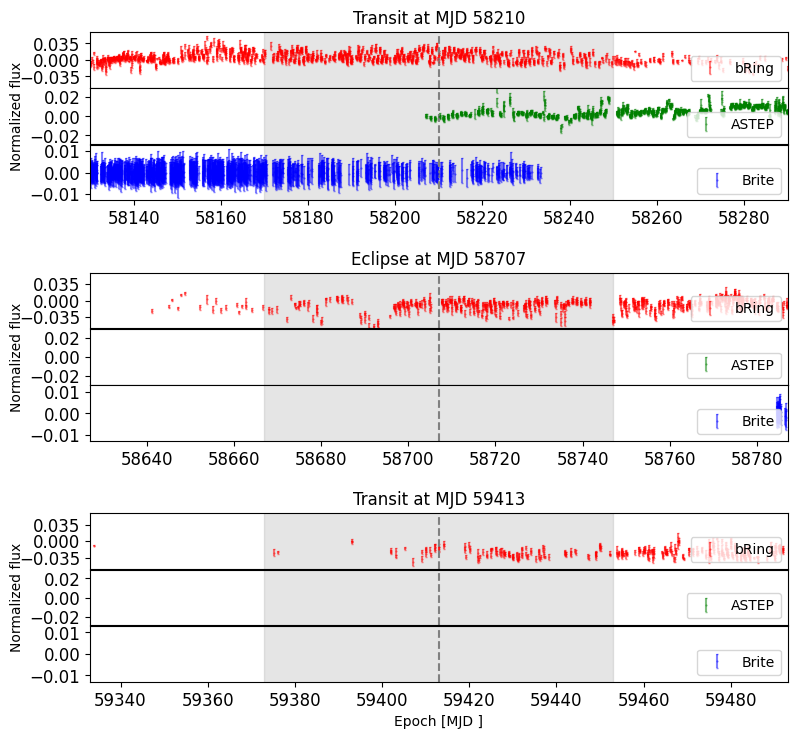

In [7]:

d_lim =80 #limit transit end and start in days
fs=10
label_size = 12
data_sets = [f_bring, f_astep, f_brite ]
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 



fig = plt.figure(figsize=(9,7)) 
subfigs = fig.subfigures(nrows=3, ncols=1, hspace=0.1)
axs = [subfig.subplots(nrows=3, ncols=1, gridspec_kw={'hspace': 0.01}) for subfig in subfigs.ravel()]

for x, subax in enumerate(axs):
    for y, ax in enumerate(subax):
        data = data_sets[y]
        ax.errorbar(data['time'], data['flux'], yerr=data['ferr'], fmt='.', alpha=0.5, label =name_instrument[y], 
                    color =color[y],capsize=1, markersize=1)

        ax.legend(fontsize = fs, loc='lower right')
        #
        ax.fill_between(np.linspace(58170,58250) , -0.2, 0.2,
                     color = 'gray', alpha =0.2)
        ax.fill_between(np.linspace(58667,58747) , -0.2, 0.2,
                     color = 'gray', alpha =0.2)
        ax.fill_between(np.linspace(59373,59453) , -0.2, 0.2,
                     color = 'gray', alpha =0.2)
        ax.axvline(transit_times[x], color='gray', linestyle = '--')
        

        if y ==0:
            ax.set_ylim(-0.059,0.059)
            ax.yaxis.set_major_locator(MultipleLocator(0.035))
            ax.set_xticks([])
        if y ==1:
            ax.set_ylim(-0.029,0.029)
            ax.yaxis.set_major_locator(MultipleLocator(0.02))
            ax.set_xticks([])
            ax.set_ylabel("Normalized flux")
        if y ==2:
            ax.set_ylim(-0.013,0.013)
            ax.yaxis.set_minor_locator(MultipleLocator(0.01))
        if x==0 and y==0:
            ax.set_title("Transit at MJD 58210", fontsize = label_size)
        if x==1 and y==0:
            ax.set_title("Eclipse at MJD 58707", fontsize = label_size)
        if x==2 and y==0:
            ax.set_title("Transit at MJD 59413", fontsize = label_size)
        ax.set_xlim(transit_times[x]-d_lim , transit_times[x]+d_lim)
        if x==2 and y==2:
            ax.set_xlabel('Epoch [MJD ]')

plt.savefig(f'Figures/All_photometric_transits.pdf', bbox_inches='tight')
plt.show()





